### Hotelling T2法（多次元バージョン）& マハラノビス=タグチ法
参考文献:<br>
> 井出剛. 2015. 入門機械学習による異常検知. コロナ社. pp.37-58.

In [61]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from typing import Union, Literal, Annotated

-----
### Hotelling T2法（多次元）

#### 多次元データにおける、ホテリングT2法の特徴
1次元の場合に加え、以下の特徴が追記される。
1. 多次元データの相関構造を考慮した異常検知が可能<br>

&nbsp;

ただし、以下点については言及することができない。
1. 異常度に対する、各変数の寄与度合い

#### ホテリングT2法（多次元）の手順 <br>
#### 1. 分布パラメーターの推定
データは多次元正規分布に従うと仮定する。
$$
N(\mathbfit{x}| \boldsymbol{\mu}, \boldsymbol{\Sigma}) = \frac{|\boldsymbol{\Sigma}|^{-1/2}}{(2 \pi)^{M/2}} \exp \biggl\{ - \frac{1}{2} (\mathbfit{x} -  \boldsymbol{\mu})^\top \boldsymbol{\Sigma}^{-1} (\mathbfit{x} -  \boldsymbol{\mu}) \biggr\}
$$

上記において、$M$ は変数 $\mathbfit{x} = (x_1, x_2, \dots, x_M)$ の次元数であり、$\boldsymbol{\mu}$ および $\boldsymbol{\Sigma}$ は以下に定義される平均ベクトル、および分散共分散行列である。<br>

$$
\boldsymbol{\mu} = (\mu_1, \mu_2, \cdots, \mu_M)
$$

$$
\boldsymbol{\Sigma} = 
\begin{pmatrix}
   \sigma_{11} &  \sigma_{12} & \dots & \sigma_{1M}\\
   \sigma_{21} & \sigma_{22} & \dots  & \sigma_{2M} \\
   \vdots & \vdots & \ddots & \vdots \\
   \sigma_{M1} & \sigma_{M2} & \dots & \sigma_{MM}
\end{pmatrix}
$$

$$
\begin{equation}
  \sigma_{ij} =
  \begin{cases}
    \rm Var & \text{if $i=j$,} \\
    \rm Cov & \text{if $i \ne j$,}
  \end{cases}
\end{equation}
$$

ここで Var とは分散、Cov とは共分散に対応する。<br>
一次元の時と同様、母集団における $\boldsymbol{\mu}$ および $\boldsymbol{\Sigma}$ は未知である。
手元に存在するデータ集合を $D = \{ \mathbfit{x}^{(1)}, \mathbfit{x}^{(2)}, \cdots, \mathbfit{x}^{(N)} \}$ とすると、最尤推定量は以下のように導出することができる。<br>

$$
\hat{\boldsymbol{\mu}} = \frac{1}{N} \sum_{n=1}^N \boldsymbol{\mu}^{(n)}
$$

$$
\hat{\boldsymbol{\Sigma}} = \frac{1}{N} \sum_{n=1}^N (\mathbfit{x}^{(n)} - \hat{\boldsymbol{\mu}})(\mathbfit{x}^{(n)} - \hat{\boldsymbol{\mu}})^\top
$$

#### 2. 異常度の定義
新たなデータx'が観測された場合、以下に定義される異常度として算出される。<br>
$$a(\mathbfit{x'}) \equiv (\mathbfit{x'} - \hat{\boldsymbol{\mu}})^\top \hat{\boldsymbol{\Sigma}}^{-1} (\mathbfit{x'} - \hat{\boldsymbol{\mu}})$$
上記異常度は一般に、マハラノビス距離と呼ばれる距離指標に対応する。

#### 3. 閾値の設定
異常度は、自由度 (M, N-M) の $F$ 分布、もしくは自由度M、スケール因子1の $\chi^2$ 分布に従うことが示される。<br>
$$ \frac{N-M}{(N+1)M} a(\mathbfit{x'}) \sim F(M, N-M)$$
$$ a(\mathbfit{x'}) \sim \chi^2(M, 1) \quad (N \gg M)$$
閾値 $a_{th}$ を設定し、使用する分布の閾値を超える場合は異常とみなす。

------
### マハラノビス=タグチ法

ホテリングT2法とほぼ同じであるが、異常度の定義は以下のように異なる。<br>
$$a(\mathbfit{x'}) \equiv \frac{1}{M} (\mathbfit{x'} - \hat{\boldsymbol{\mu}})^\top \hat{\boldsymbol{\Sigma}}^{-1} (\mathbfit{x'} - \hat{\boldsymbol{\mu}})$$

上式で $M$ は、入力変数の次元である。<br>
ただし、上式は変数の次元で割っているため、ホテリングT2法のように統計分布をもとにした閾値の設定が不可となっている。<br>

&nbsp;

また、各変数の異常度に対する寄与は、経験的導入されたSN比より確認することが可能である。<br>
以下の式は、データセット $\boldsymbol{D'} = \{\mathbfit{x'}^{(1)}, \cdots, \mathbfit{x'}^{(N')} \}$ のある変数ペア $q$ におけるSN比に対応している。<br>
$$ SN_q \equiv = -10\log{10} \biggl\{ \frac{1}{N'} \sum_{n=1}^{N'} \frac{1}{a_q(\mathbfit{x'}^{(n)})/M_q} \biggr\} $$
ただし、一般には、 $N'=1$、 $M_q=1$ を扱うことが多く、この場合SN比は以下のように簡略化される。<br>
$$SN_q = 10\log10\frac{a_q(\mathbfit{x'})}{M_q} = 10\log10\frac{(x'_q-\hat{\mu}_q)^2}{\hat{\sigma}^2_q}$$
この場合のSN比は、各変数におけるマハラノビス距離の対数値に対応することがわかる。<br>
SN比が正であれば、平均からのズレが標準偏差より十分大きいため異常に大きく寄与し、SN比が負の場合は平均からのズレがほとんどないため異常度には寄与しない、という解釈を付与することができる。

### 関数の実装

In [147]:
def covmat(x_mat):
    covmat = x_mat.T@x_mat/x_mat.shape[0]
    return covmat

def check_dtype(x_mat):
    if type(x_mat) == np.ndarray:
        return x_mat
    elif type(x_mat) == pd.DataFrame:
        return x_mat.values
    else:
        raise TypeError("Invalid input. Data type must be numpy.ndarray or pandas.DataFrame")



class HotellingT2MD:
    def __init__(self):
        self.x_mat = None #行：対象、列：変数、に対応するインプットを受け付ける
        self.x_mat_centered = None #中心化行列
        self.mu_vector_hat = None 
        self.sigma_mat_hat = None
        self.sample_size = None
        self.variable_dim = None
        #経験的しきい値用に異常値を計算しておく
        self.anomaly_score_train = None

    def fit(self, x_mat: Union[np.ndarray, pd.DataFrame]):
        #型確認
        x_mat = check_dtype(x_mat)
        #格納する
        self.x_mat = x_mat
        self.mu_vector_hat = np.mean(x_mat, axis=0)
        self.x_mat_centered = x_mat - self.mu_vector_hat
        self.sigma_mat_hat = covmat(self.x_mat_centered)
        self.sample_size = self.x_mat_centered.shape[0]
        self.variable_dim = self.x_mat_centered.shape[1]
        
    
    def get_anomaly_score(self, x_test: Union[np.ndarray, pd.DataFrame]) -> Union[float, np.ndarray]:
        #テストデータの型確認と中心化を行う
        x_test = check_dtype(x_test)
        x_test_centered = x_test - self.mu_vector_hat
        
        #テストデータにおける異常度の算出
        anomaly_score = np.sum((x_test_centered@np.linalg.inv(self.sigma_mat_hat))*x_test_centered, axis=1)
        #訓練データの異常度の算出
        self.anomaly_score_train = np.sum((self.x_mat_centered@np.linalg.inv(self.sigma_mat_hat))*self.x_mat_centered, axis=1)
        
        return anomaly_score

    def anomaly_judgement(self, anomaly_score: Union[float, np.ndarray],
                          a_threshold: Annotated[Union[int, float], "0.0 <= value <= 1.0"],
                          dist: Literal["chi_square", "chi_square_adjusted", "f", None]) -> Union[float, np.ndarray]:
        #閾値が適切か確認する
        if not (0.0 <= a_threshold <= 1.0):
            raise ValueError("a_threshold must be within 0.0-1.0.")

        #閾値に基づく異常判定
        if dist == "f": #F分布の場合
            percentile = self.F_percentile(anomaly_score)
            anomaly_judgement = (percentile < a_threshold)*1 #異常判定 
        elif dist == "chi_square": #χ2乗分布の場合
            percentile = self.chi_square_percentile(anomaly_score)
            anomaly_judgement = (percentile < a_threshold)*1 #異常判定
        elif dist == "chi_square_adjusted":
            percentile = self.fitted_chi_square_percentile(anomaly_score)
            anomaly_judgement = (percentile < a_threshold)*1 #異常判定
        elif dist == None: #経験的閾値の適応に対応
            empirical_threshold = np.percentile(self.anomaly_score_train, (1 - a_threshold)*100)
            anomaly_judgement = (empirical_threshold < anomaly_score)*1 #異常判定 
        else:
            raise ValueError("Invalid ditribution. Input must be 'chi_square', 'chi_square_adjusted', 'f', or None.")
           
        return anomaly_judgement

    def chi_square_percentile(self, anomaly_score: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
        #自由度1, スケール因子1の χ二乗分布に従うため、異常値がどのパーセンタイルに対応するか算出する
        chi_square_percentile = stats.chi2.cdf(anomaly_score, df=self.variable_dim, scale=1)
        return 1 - chi_square_percentile

    #pp.64-65
    def fitted_chi_square_percentile(self, anomaly_score: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
        #訓練データの異常値にχ2乗分布をあてはめ、ここから自由度・スケール因子を算出する
        a_e = (1/self.sample_size)*(np.sum(self.anomaly_score_train))
        a_square_e = (1/self.sample_size)*(np.sum(self.anomaly_score_train**2))
        m_hat = 2*a_e**2/(a_square_e-a_e**2) #自由度
        s_hat = (a_square_e-a_e**2)/2*a_e #スケール因子
        
        #自由度1, スケール因子1の χ二乗分布に従うため、異常値がどのパーセンタイルに対応するか算出する
        chi_square_percentile = stats.chi2.cdf(anomaly_score, df=m_hat, scale=s_hat)
        return 1 - chi_square_percentile

    def F_percentile(self, anomaly_score: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
        #自由度（M, N-M）の F分布に従うため、異常値がどのパーセンタイルに対応するか算出する
        scaling_factor = (self.sample_size-self.variable_dim)/((self.sample_size+1)*self.variable_dim)
        f_percentile = stats.f.cdf(scaling_factor*anomaly_score, dfn=self.variable_dim, dfd=self.sample_size-self.variable_dim, scale=1)
        return 1 - f_percentile


class MaharanobisTaguchi:
    def __init__(self):
        self.x_mat = None #行：対象、列：変数、に対応するインプットを受け付ける
        self.x_mat_centered = None #中心化行列
        self.mu_vector_hat = None 
        self.sigma_mat_hat = None
        self.sigma_vector_hat = None #寄与度算出用
        self.sample_size = None
        self.variable_dim = None
        self.anomaly_score_train = None

    def fit(self, x_mat: Union[np.ndarray, pd.DataFrame]):
        #型確認
        x_mat = check_dtype(x_mat)
        #格納する
        self.x_mat = x_mat
        self.mu_vector_hat = np.mean(x_mat, axis=0)
        self.sigma_vector_hat = np.std(x_mat, axis=0)
        self.x_mat_centered = x_mat - self.mu_vector_hat
        self.sigma_mat_hat = covmat(self.x_mat_centered)
        self.sample_size = self.x_mat_centered.shape[0]
        self.variable_dim = self.x_mat_centered.shape[1]
    
    def get_anomaly_score(self, x_test: Union[np.ndarray, pd.DataFrame]) -> Union[float, np.ndarray]:
        #テストデータの型確認と中心化を行う
        x_test = check_dtype(x_test)
        x_test_centered = x_test - self.mu_vector_hat
        
        #テストデータにおける異常度の算出（1変数当たりの）
        anomaly_score = np.sum((x_test_centered@np.linalg.inv(self.sigma_mat_hat))*x_test_centered, axis=1)/self.variable_dim
        #訓練データの異常度の算出（1変数あたりの）
        self.anomaly_score_train = np.sum((self.x_mat_centered@np.linalg.inv(self.sigma_mat_hat))*self.x_mat_centered, axis=1)/self.variable_dim
        
        return anomaly_score

    def anomaly_judgement(self, anomaly_score: Union[float, np.ndarray],
                          a_threshold: Annotated[Union[int, float], "0.0 <= value <= 1.0"]) -> Union[float, np.ndarray]:
        #閾値が適切か確認する
        if not (0.0 <= a_threshold <= 1.0):
            raise ValueError("a_threshold must be within 0.0-1.0.")
        #閾値に基づく異常判定
        empirical_threshold = np.percentile(self.anomaly_score_train, (1 - a_threshold)*100)
        anomaly_judgement = (empirical_threshold < anomaly_score)*1 #異常判定 
        
        return anomaly_judgement

    def SN_score(self, x_test: Union[np.ndarray, pd.DataFrame]) -> np.ndarray:
        x_test = check_dtype(x_test)
        SN_score = 10*np.log10((x_test - self.mu_vector_hat)**2/self.sigma_vector_hat**2)
        return SN_score

### 例題への適用（Hotelling T2）
Davisデータセットに適用する

In [51]:
#Davis
current_path = os.getcwd()
df_davis = pd.read_csv(os.path.join(os.path.dirname(current_path), "dataset", "Davis.csv"))
df_davis = df_davis[["weight", "height"]]

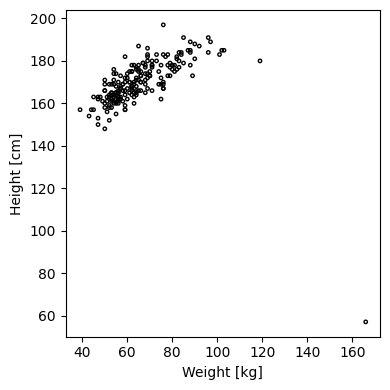

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.scatter(df_davis["weight"], df_davis["height"], facecolor="None", edgecolor="black", s=6)
ax.set_xlabel("Weight [kg]")
ax.set_ylabel("Height [cm]")
plt.tight_layout()
plt.show()
plt.close()

下側半分のデータを基に、モデルを構築する。<br>
対象は体重データ。

In [86]:
#変数の定義
x = df_davis.values
x_train, x_test = x[100:], x[:100]

#異常検知
cls = HotellingT2MD() #閾値：上位1%に設定
cls.fit(x_train)
anomaly_score_test = cls.get_anomaly_score(x_test)
anomaly_score_train = cls.anomaly_score_train
anomaly_train_flag, anomaly_test_flag = cls.anomaly_judgement(anomaly_score_train, dist="chi_square_adjusted", a_threshold=.05), \
                                        cls.anomaly_judgement(anomaly_score_test, dist="chi_square_adjusted", a_threshold=.05)

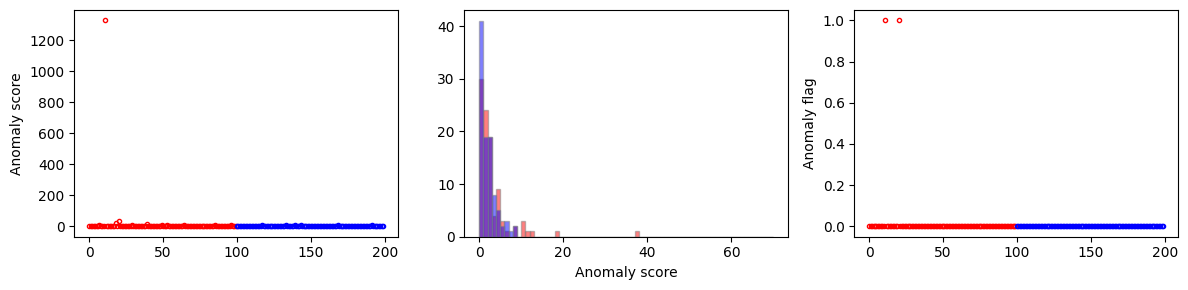

In [87]:
#結果の描画
fig, ax = plt.subplots(1, 3, figsize=(12, 3))
ax[0].plot(np.arange(len(anomaly_score_test)), anomaly_score_test, ls="", 
         marker="o", markerfacecolor="none", markeredgecolor="red", markersize=3)
ax[0].plot(np.arange(len(anomaly_score_test), len(anomaly_score_test)*2), anomaly_score_train, ls="", 
         marker="o", markerfacecolor="none", markeredgecolor="blue", markersize=3)
ax[0].set_ylabel("Anomaly score")

ax[1].hist(anomaly_score_test, facecolor="red", edgecolor="gray", range=(0, 70), bins=70, alpha=0.5)
ax[1].hist(anomaly_score_train, facecolor="blue", edgecolor="gray", range=(0, 70), bins=70, alpha=0.5)
ax[1].set_xlabel("Anomaly score")

ax[2].plot(np.arange(len(anomaly_score_test)), anomaly_test_flag, ls="", 
         marker="o", markerfacecolor="none", markeredgecolor="red", markersize=3)
ax[2].plot(np.arange(len(anomaly_score_test), len(anomaly_score_test)*2), anomaly_train_flag, ls="", 
         marker="o", markerfacecolor="none", markeredgecolor="blue", markersize=3)
ax[2].set_ylabel("Anomaly flag")

plt.tight_layout()
plt.show()
plt.close()

### 例題への適用（マハラノビス-タグチ）
carデータセットに適用する

In [135]:
#Davis
current_path = os.getcwd()
df_car = pd.read_csv(os.path.join(os.path.dirname(current_path), "dataset", "road.csv"), index_col=0)
#drivesにより割った後、対数変換を行う
df_car = (df_car.T/df_car["drivers"].values).T
df_car.drop(columns=["drivers"], inplace=True)
df_car["rural"] = df_car["rural"]+1
df_car_log  = np.log(df_car)

In [148]:
cls = MaharanobisTaguchi()
cls.fit(df_car_log)
anomaly_score = cls.get_anomaly_score(df_car_log)
SN_score = cls.SN_score(df_car_log)

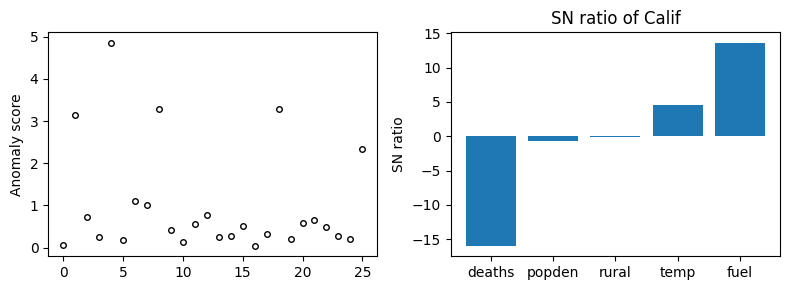

In [163]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax[0].plot(anomaly_score, marker="o", ls="", markerfacecolor="None", markeredgecolor="black", markersize=4)
ax[0].set_ylabel("Anomaly score")
ax[1].bar(df_car.columns, SN_score[4]) #カリフォルニアのデータのみ描画
ax[1].set_ylabel("SN ratio")
ax[1].set_title("SN ratio of Calif")
plt.tight_layout()
plt.show()
plt.close()